# Quiz 2, estadísticos y visualizaciones

Contexto: 'Floating Pandas, Inc.' es una empresa tecnológica innovadora que ofrece una plataforma de meditación y bienestar personalizada. El servicio se basa en una suscripción mensual de $10.80, proporcionando acceso a una variedad de meditaciones guiadas, ejercicios de mindfulness y herramientas de gestión del estrés adaptadas a las necesidades individuales de los usuarios. Esta tarifa permite a la empresa mantener una calidad alta en el contenido ofrecido y asegurar la actualización constante de su plataforma.

'Floating Pandas, Inc.' ha observado variaciones en la retención de clientes y busca identificar factores clave que podrían estar influyendo en este aspecto. La empresa está interesada en entender que es lo que esta afectando la relación a largo plazo con ellos así como esto impacta en el LTV esperado de sus clientes a 2 años.

Datos disponibles: .

Actividad 1):

- Objetivo: Identificar y visualizar factores que afectan la retención de clientes.
- Actividad: Utiliza gráficos para explorar la relación entre el NPS, los segmentos de clientes, y su Lifespan. Investiga si hay patrones o tendencias claras.
- Recomendación: Basándote en tus hallazgos, propone acciones específicas que 'Floating Pandas, Inc.' podría implementar para mejorar la retención y aumentar el LTV esperado de sus clientes.

Actividad 2):

Dada tu previa recomendación, ahora 'Floating Pandas, Inc.' está revisando su estrategia de asignación de recursos de marketing para maximizar el retorno sobre la inversión en diferentes segmentos de clientes.

- Objetivo: Analizar y comparar la efectividad del gasto en marketing en diferentes segmentos de clientes.
- Tarea: Calcula y visualiza cómo varía el CAC y el LTV a través del tiempo por segmento. Identifica cuáles segmentos ofrecen el mayor retorno sobre la inversión y cuáles podrían estar sub-optimizados.
- Recomendación: Formula estrategias de realineación de la inversión en marketing basadas en los datos analizados para optimizar los retornos futuros.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [37]:
data = pd.read_csv("customer_data2.csv")

In [39]:
data.head()

,Customer_ID,Acquisition_Month,Segment,NPS_Score,Expected_Lifespan_Months,CAC,Technical_Issues,Expected_LTV_in_Two_Years
0,1,2022-01-31,Mid-Career,3,0,41.173062,2,0
1,2,2022-01-31,Young Professional,6,5,41.173062,1,54
2,3,2022-01-31,Mid-Career,5,22,41.173062,0,237
3,4,2022-01-31,Mid-Career,8,15,41.173062,2,162
4,5,2022-01-31,Young Professional,10,32,41.173062,0,259


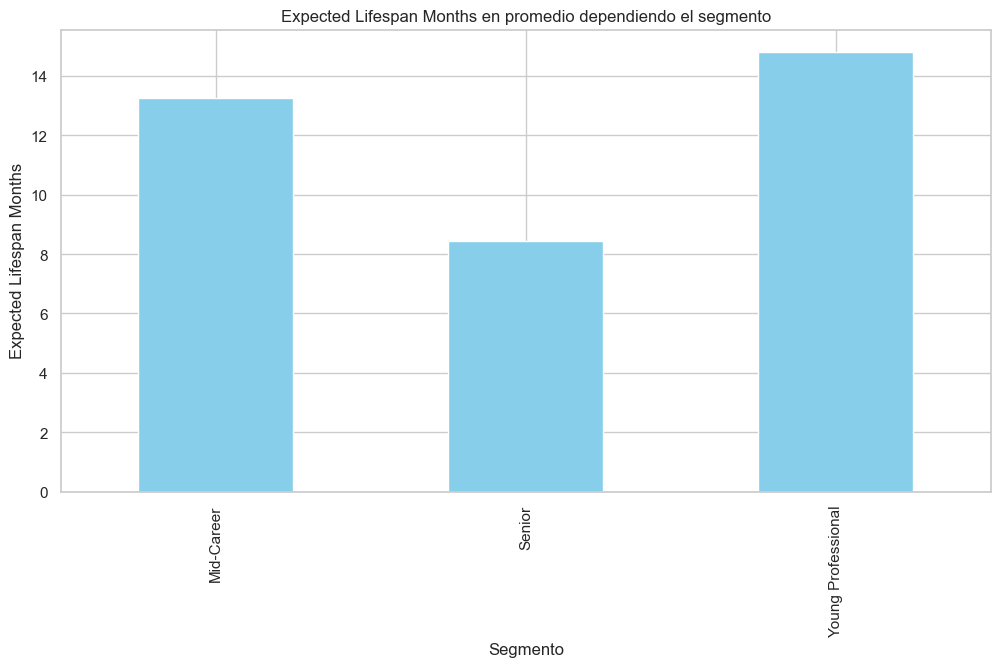

In [103]:
data.groupby("Segment")['Expected_Lifespan_Months'].mean().plot(kind='bar', color= 'skyblue')

plt.title("Expected Lifespan Months en promedio dependiendo el segmento")

plt.xlabel("Segmento")

plt.ylabel("Expected Lifespan Months")

plt.show()

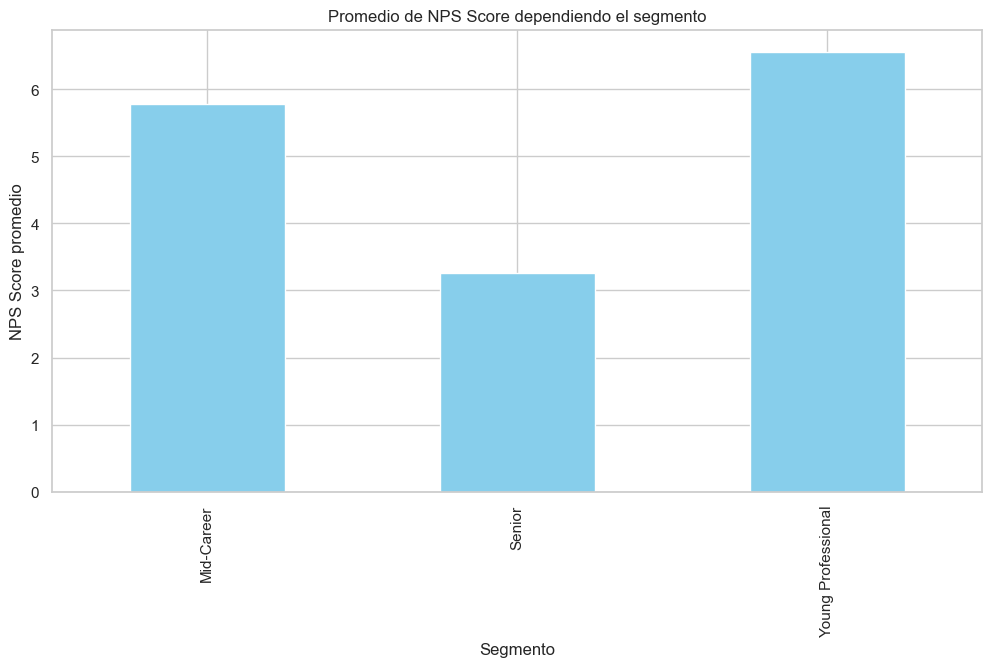

In [43]:
data.groupby("Segment")['NPS_Score'].mean().plot(kind='bar', color= 'skyblue')

plt.title("Promedio de NPS Score dependiendo el segmento")

plt.xlabel("Segmento")

plt.ylabel("NPS Score promedio")

plt.show()

/var/folders/hp/74fh93z51nbgcfx2dccxw8w80000gn/T/ipykernel_1216/1697041903.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "NPS_Score", y="Expected_Lifespan_Months", data=data, palette='Set3')


<Axes: xlabel='NPS_Score', ylabel='Expected_Lifespan_Months'>

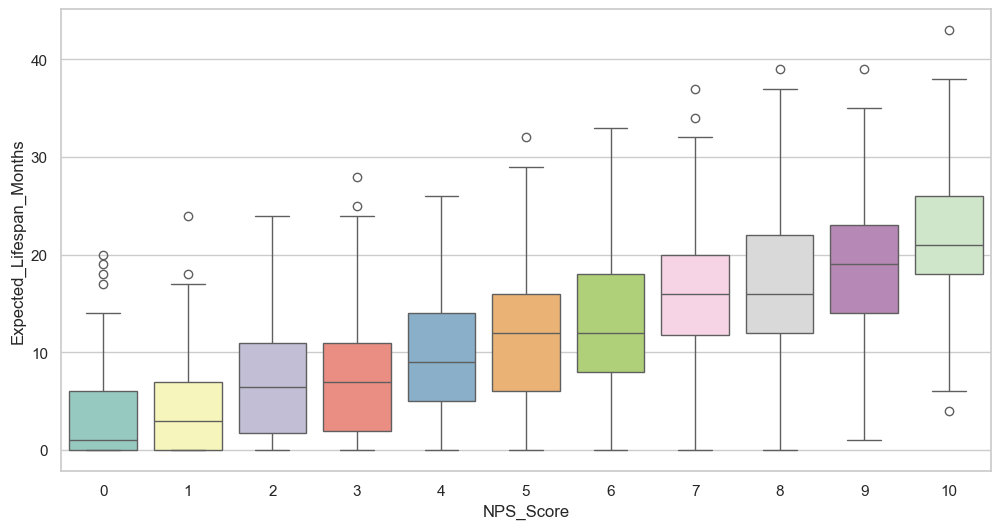

In [51]:
sns.boxplot(x= "NPS_Score", y="Expected_Lifespan_Months", data=data, palette='Set3')

Al analizar los datos podemos notar que los jovenes profesionistas son los que tienen mas tiempo esperado de seguir pagando la mensualidad y de igual manera podemos notar que son los que tienen mayor nps score en promedio, de igual manera notamos que la gente recomienda mas la empresa es la gente que suele esperarse que se quede mas tiempo en la empresa. En este caso una recomendacion seria el enfocarse mas e invertir mas dinero en el marketing hacia los jovenes profesionistas, encontrar la manera de atraer mas de ellos y no tanto de las personas mayores, ya que los jovenes profesionistas son los que mas tiempo se espera que se queden y son los que mayor calificacion tienen en  los nps, provocando que recomienden y atraigan a mas clientela

In [85]:
data["cac_ltv"]= data["Expected_LTV_in_Two_Years"]/data["CAC"]

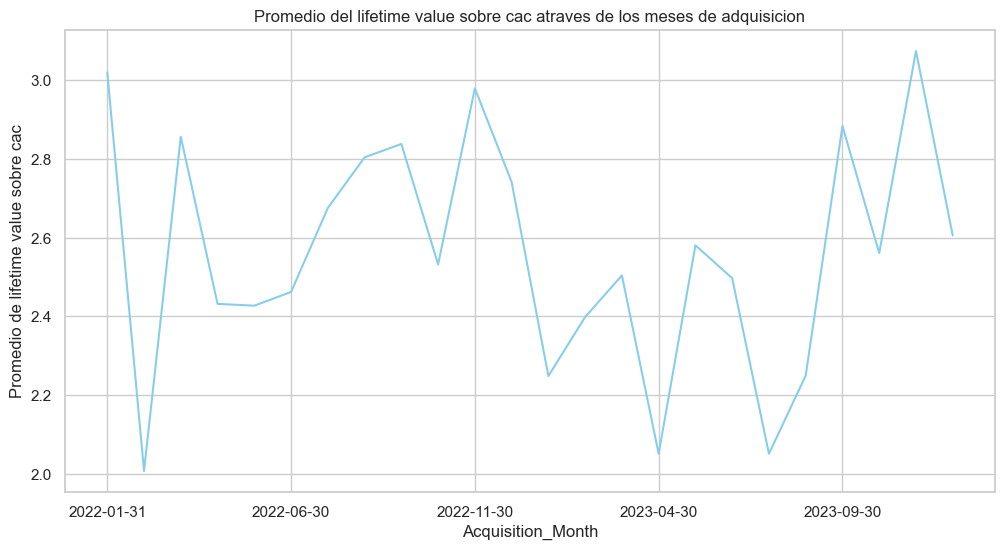

In [105]:
data.groupby("Acquisition_Month")['cac_ltv'].mean().plot(kind='line', color= 'skyblue')

plt.title("Promedio del lifetime value sobre cac atraves de los meses de adquisicion")

plt.xlabel("Acquisition_Month")

plt.ylabel("Promedio de lifetime value sobre cac")

plt.show()

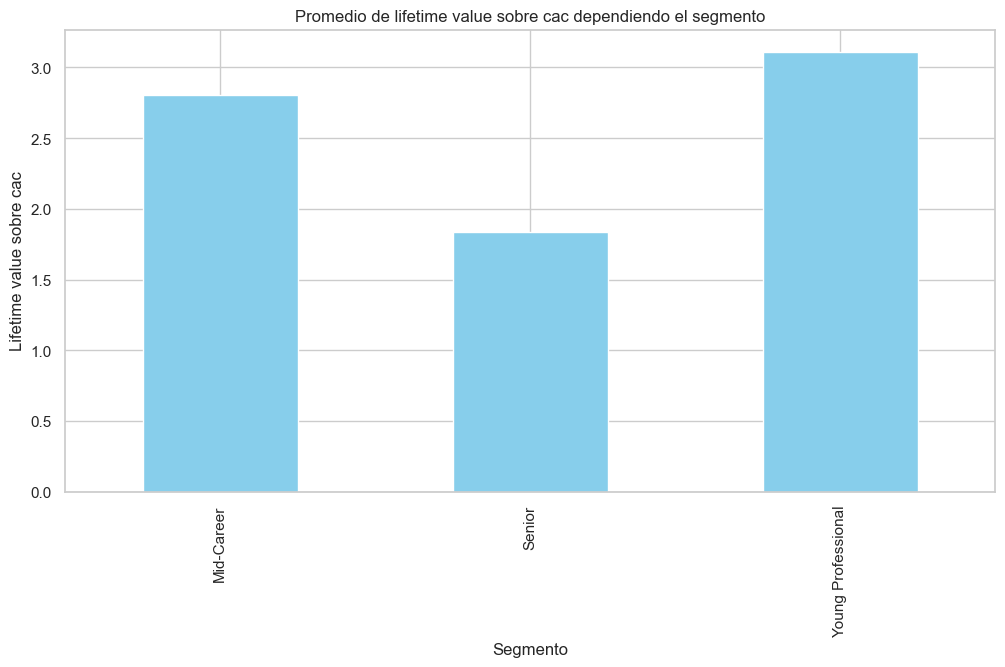

In [107]:
data.groupby("Segment")['cac_ltv'].mean().plot(kind='bar', color= 'skyblue')

plt.title("Promedio de lifetime value sobre cac dependiendo el segmento")

plt.xlabel("Segmento")

plt.ylabel("Lifetime value sobre cac")

plt.show()

En la relacion del ratio del lifetime value con el cac, podemos ver que en relacion con el mes de adquisicion el lifetime value sobre cac varia demasiado no existe como tal una tendencia, es algo que va subiendo y bajando de manera drastica y aleatoria, comparando el lifetime value con los segmentos, podemos ver que en promedio por dolar que se gasta en marketing en los jovenes profesionistas son los que mas dinero retornan a la empresa, aunque son los que mejor promedio de ltv sobre cac tienen, los de carrera media dan un poco menos que los jovenes profesionistas. Como recomendacion y como fue mencionado anteriormente sería enfocarse en atraer clientes nuevos que sean jovenes profesionistas ya que son los que mas lifetime value dan por dolar que se gasta en marketing, despues tambien seria importante enfocarse en los de carrera media, aunque no tanto como los jovenes profesionistas y enfocarse bastante menos en los mayores ya que son los que menos lifetime value brindan a la empresa por dolar de marketing que se gasta